In [17]:
import seaborn as sns
import upsetplot
import pandas as pd
import numpy
import pylab
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [25]:
df_sp = pd.read_csv('../data/250830_tax_species.gtdbmag.summary.csv')
df_sp= df_sp[["lineage","n_found"]]


# sort it 
df_sp = df_sp.sort_values('n_found', ascending=False)
len(df_sp)

55526

In [26]:
df_count = df_sp['n_found'].value_counts().to_frame()

In [27]:
df_count['perc_sp']  = (df_count['count']/55526)*100

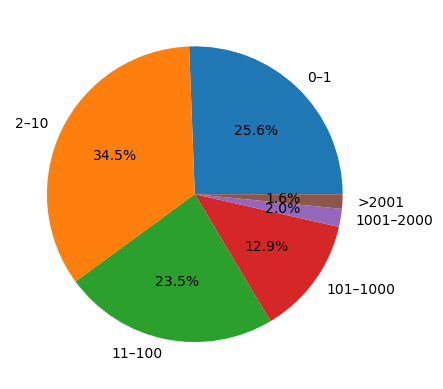

In [28]:
# set bins for num metaG found in
bins = {
    "0–1": (0, 1),
    "2–10": (2, 10),
    "11–100": (11, 100),
    "101–1000": (101, 1000),
    "1001–2000": (1001, 2000),
    ">2001": (2001, float("inf"))
}

grouped = {}
for label, (low, high) in bins.items():
    grouped[label] = df_count.loc[df_count.index.to_series().between(low, high), "perc_sp"].sum()

labels = list(grouped.keys())
sizes = list(grouped.values())

plt.pie(sizes, labels=labels, autopct="%.1f%%")
plt.show()
#plt.savefig('../plots/250902_pie_num_metaG_spisin.pdf')



In [33]:
# how many MAGs in 99%
mask = df_count.index.to_series().between(3180, 3500)
print(df_count.loc[mask, "perc_sp"].sum())
print(df_count.loc[mask, "count"].sum())

0.02701437164571552
15


## How many metaGs is a spp found in?
Most are in one or 2 

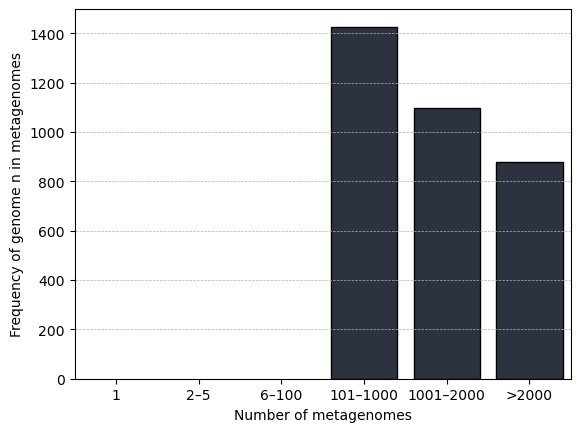

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

custom_bins = [0, 1, 5, 100, 1000, 2000, df_sp["n_found"].max()]
labels = ["1", "2–5", "6–100", "101–1000", "1001–2000", ">2000"]

# cut into categories using the correct bins
df_sp["bin"] = pd.cut(df_sp["n_found"], bins=custom_bins, labels=labels, include_lowest=True)

# plot histogram as counts per bin
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
sns.countplot(x="bin", data=df_sp, color="#293241", edgecolor="black")

plt.xlabel("Number of metagenomes")
plt.ylabel("Frequency of genome n in metagenomes")
#plt.yscale("log")
plt.show()


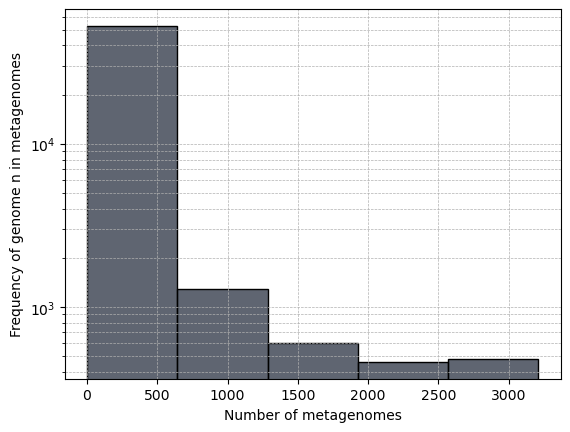

In [30]:
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
sns.histplot(df_sp['n_found'], bins=5, kde=False, color='#293241')  # more bins = thinner bars
plt.xlabel("Number of metagenomes")
plt.ylabel("Frequency of genome n in metagenomes")
# plt.title("Distribution of Counts")

plt.yscale("log")
#plt.savefig('../plots/250902_hist_species_metaG.pdf')


Text(0, 0.5, 'Number of metagenomes species was recovered from')

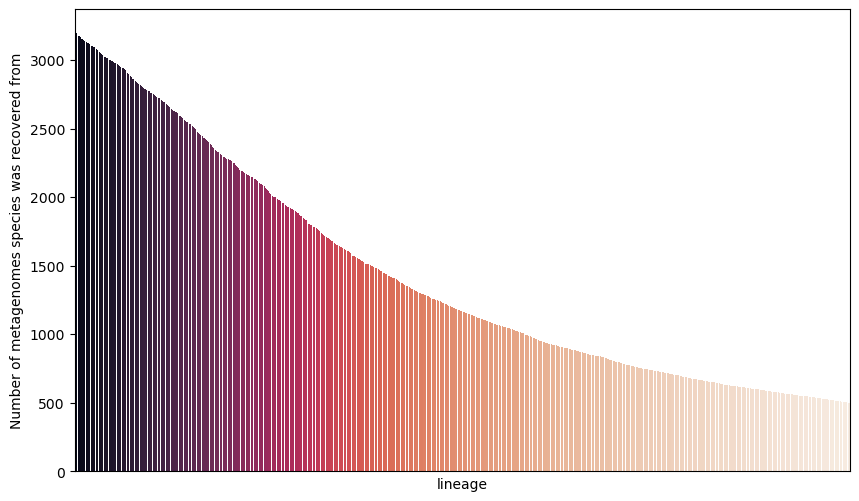

In [31]:
# subset bc plot will take forever 
df_sp = df_sp[df_sp['n_found'] >= 500]

plt.figure(figsize=(10, 6)) 

# Barplot with color mapped to count values
sns.barplot(
    data=df_sp,
    x='lineage',
    y='n_found',
    hue='n_found',          # map color to count
    palette='rocket_r',    # color scale
    dodge=False,          # keeps single bar per x
    legend=False          # hide legend if not needed
)
plt.xticks([])
plt.ylabel("Number of metagenomes species was recovered from")
#plt.savefig('../plots/250902_num_species_metaG.cutoff300.pdf')
